In [1]:
import sys
import time
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import savgol_filter

In [2]:
ieee14models = pd.read_excel("Raw_Results/RESULTS_IEEE14_MainModelsTest_earlyStop_100Epochs.xlsx")

ieee14models.head()

,Unnamed: 0,Sparsity,Model 1 Accuracy,Model 7 Accuracy,Model 1 F1,Model 7 F1,Model 1 Precision,Model 7 Precision,Model 1 Recall,Model 7 Recall,Model 1 False Positive Rate,Model 7 False Positive Rate
0,0,0.1,0.7395,0.9070,0.647735,0.897464,1.00000,1.000000,0.479,0.814,0.000,0.000
1,1,0.2,0.8325,0.9605,0.798799,0.958876,1.00000,1.000000,0.665,0.921,0.000,0.000
2,2,0.3,0.8840,0.9800,0.868778,0.979592,1.00000,1.000000,0.768,0.960,0.000,0.000
3,3,0.4,0.9170,0.9890,0.909487,0.988878,1.00000,1.000000,0.834,0.978,0.000,0.000
4,4,0.5,0.9265,0.9970,0.920755,0.996994,0.99883,0.998996,0.854,0.995,0.001,0.001


In [3]:
ieee14dct = pd.read_excel("Raw_Results/RESULTS_IEEE14_ClassifiersTest.xlsx", sheet_name = "DCT")
ieee14gnb = pd.read_excel("Raw_Results/RESULTS_IEEE14_ClassifiersTest.xlsx", sheet_name = "GNB")
ieee14knn = pd.read_excel("Raw_Results/RESULTS_IEEE14_ClassifiersTest.xlsx", sheet_name = "KNN")

In [4]:
sparsity = ieee14models['Sparsity']
model1_accuracy = ieee14models['Model 1 Accuracy']
model7_accuracy = ieee14models['Model 7 Accuracy']
model1_f1 = ieee14models['Model 1 F1']
model7_f1 = ieee14models['Model 7 F1']
model1_precision = ieee14models['Model 1 Precision']
model7_precision = ieee14models['Model 7 Precision']
model1_recall = ieee14models['Model 1 Recall']
model1_recall = ieee14models['Model 7 Recall']

In [5]:
dct_accuracy = ieee14dct['Accuracy']
dct_f1 = ieee14dct['F1 score']
dct_precision = ieee14dct['Precision']
dct_recall = ieee14dct['Recall']

gnb_accuracy = ieee14gnb['Accuracy']
gnb_f1 = ieee14gnb['F1 score']
gnb_precision = ieee14gnb['Precision']
gnb_recall = ieee14gnb['Recall']

knn_accuracy = ieee14knn['Accuracy']
knn_f1 = ieee14knn['F1 score']
knn_precision = ieee14knn['Precision']
knn_recall = ieee14knn['Recall']

In [6]:
SMALL_SIZE = 10
MEDIUM_SIZE = 16
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
title_font = {'fontname':'Arial', 'size':'18', 'color':'black', 'weight':'normal',
              'verticalalignment':'bottom'} # Bottom vertical alignment for more space

## Accuracy Plot

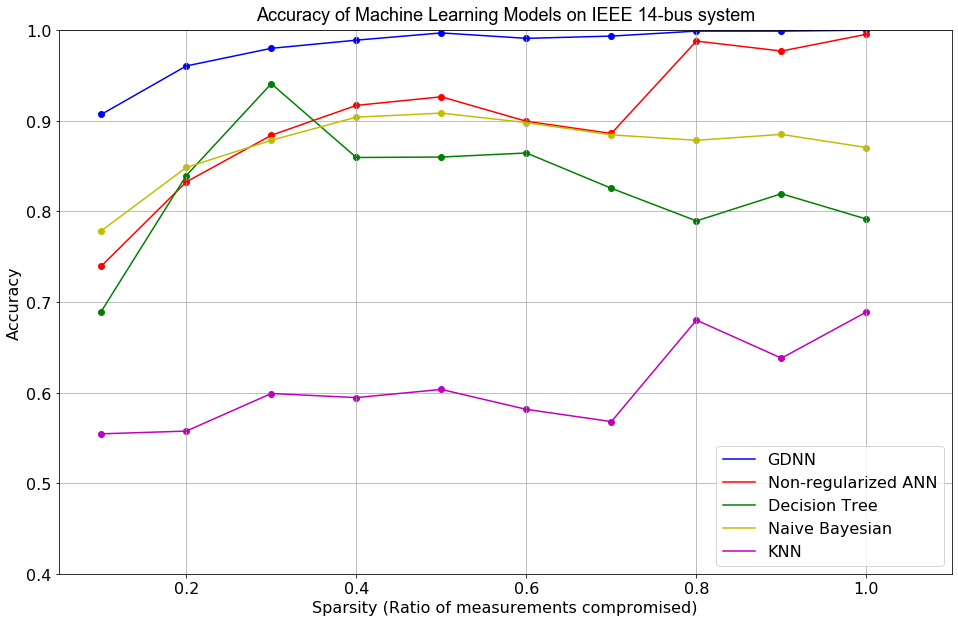

In [7]:
plt.figure(figsize=(16,10))
plt.scatter(sparsity,model7_accuracy, color = 'b')
plt.plot(sparsity,model7_accuracy, 'b-', label="GDNN")

plt.scatter(sparsity,model1_accuracy, color = 'r')
plt.plot(sparsity,model1_accuracy, 'r-', label="Non-regularized ANN")

plt.scatter(sparsity,dct_accuracy, color = 'g')
plt.plot(sparsity,dct_accuracy, 'g-', label="Decision Tree")

plt.scatter(sparsity,gnb_accuracy, color = 'y')
plt.plot(sparsity,gnb_accuracy, 'y-', label="Naive Bayesian")

plt.scatter(sparsity,knn_accuracy, color = 'm')
plt.plot(sparsity,knn_accuracy, 'm-', label="KNN")
plt.ylabel('Accuracy')
plt.xlabel('Sparsity (Ratio of measurements compromised)')
plt.legend(loc="lower right")
plt.title('Accuracy of Machine Learning Models on IEEE 14-bus system', **title_font)
plt.axis([0.05,1.1,0.4,1])
plt.grid()

plt.savefig('IEEE14_accuracies.png')
plt.show()

## F1 Score Plot

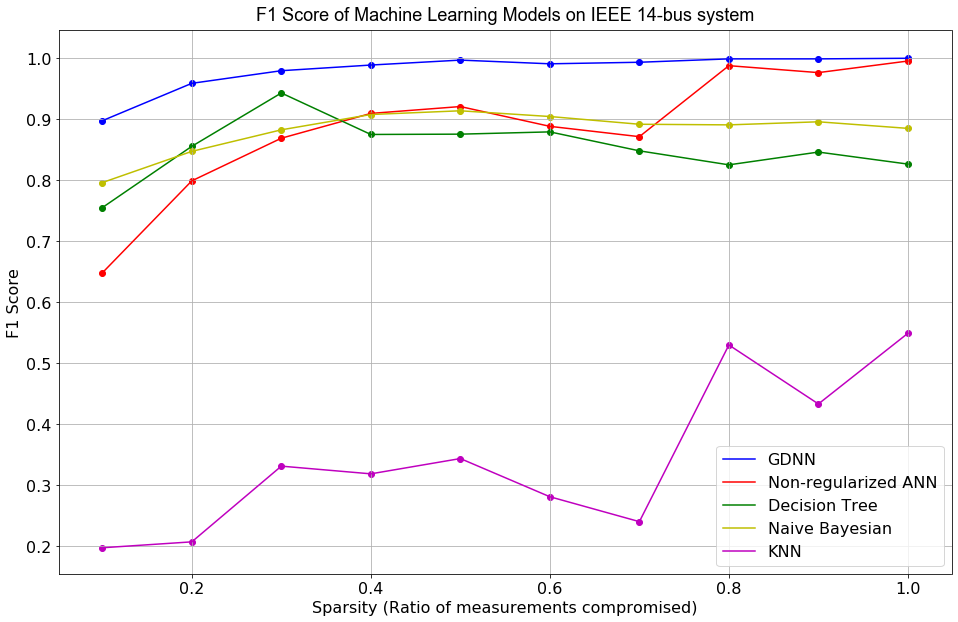

In [8]:
plt.figure(figsize=(16,10))
plt.scatter(sparsity,model7_f1, color = 'b')
plt.plot(sparsity,model7_f1, 'b-', label="GDNN")

plt.scatter(sparsity,model1_f1, color = 'r')
plt.plot(sparsity,model1_f1, 'r-', label="Non-regularized ANN")

plt.scatter(sparsity,dct_f1, color = 'g')
plt.plot(sparsity,dct_f1, 'g-', label="Decision Tree")

plt.scatter(sparsity,gnb_f1, color = 'y')
plt.plot(sparsity,gnb_f1, 'y-', label="Naive Bayesian")

plt.scatter(sparsity,knn_f1, color = 'm')
plt.plot(sparsity,knn_f1, 'm-', label="KNN")
plt.ylabel('F1 Score')
plt.xlabel('Sparsity (Ratio of measurements compromised)')
plt.legend(loc="lower right")
plt.title('F1 Score of Machine Learning Models on IEEE 14-bus system', **title_font)
plt.grid()

plt.savefig('IEEE14_F1.png')
plt.show()

## Precision Plot

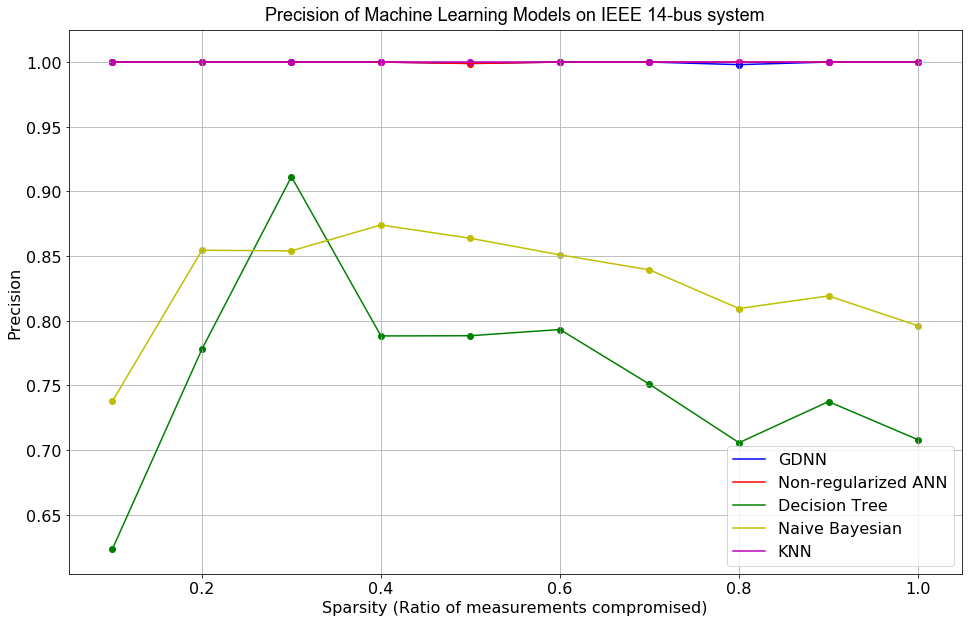

In [9]:
plt.figure(figsize=(16,10))
plt.scatter(sparsity,model7_precision, color = 'b')
plt.plot(sparsity,model7_precision, 'b-', label="GDNN")

plt.scatter(sparsity,model1_precision, color = 'r')
plt.plot(sparsity,model1_precision, 'r-', label="Non-regularized ANN")

plt.scatter(sparsity,dct_precision, color = 'g')
plt.plot(sparsity,dct_precision, 'g-', label="Decision Tree")

plt.scatter(sparsity,gnb_precision, color = 'y')
plt.plot(sparsity,gnb_precision, 'y-', label="Naive Bayesian")

plt.scatter(sparsity,knn_precision, color = 'm')
plt.plot(sparsity,knn_precision, 'm-', label="KNN")
plt.ylabel('Precision')
plt.xlabel('Sparsity (Ratio of measurements compromised)')
plt.legend(loc="lower right")
plt.title('Precision of Machine Learning Models on IEEE 14-bus system', **title_font)
plt.grid()


## Average Results

In [10]:
DGNN_acc = np.mean(model7_accuracy)
DGNN_f1 = np.mean(model7_f1)
ANN_acc = np.mean(model1_accuracy)
ANN_f1 = np.mean(model1_f1)

DCT_acc = np.mean(dct_accuracy)
DCT_f1 = np.mean(dct_f1)
GNB_acc = np.mean(gnb_accuracy)
GNB_f1 = np.mean(gnb_f1)
KNN_acc = np.mean(knn_accuracy)
KNN_f1 = np.mean(knn_f1)

In [11]:
print("DCT accuracy = {}, f1 = {}".format(DCT_acc,DCT_f1))
print("GNB accuracy = {}, f1 = {}".format(GNB_acc,GNB_f1))
print("KNN accuracy = {}, f1 = {}".format(KNN_acc,KNN_f1))

print("ANN accuracy = {}, f1 = {}".format(ANN_acc,ANN_f1))
print("DGNN accuracy = {}, f1 = {}".format(DGNN_acc,DGNN_f1))

DCT accuracy = 0.828, f1 = 0.8528459715301546
GNB accuracy = 0.8734499999999998, f1 = 0.8814667150108356
KNN accuracy = 0.60655, f1 = 0.34246968195721916
ANN accuracy = 0.9045499980449676, f1 = 0.8864949757781005
DGNN accuracy = 0.9816000044345856, f1 = 0.9804178968082404
